In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def _fpart(x):
    return x - int(x)
 
def _rfpart(x):
    return 1.0 - _fpart(x)
 
def _round(x):
    return int(np.floor(x+0.5))

def lineXW(x1, y1, x2, y2, data):
    
    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    
    
    if steep:
        x1, y1, x2, y2 = y1, x1, y2, x2
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
    dx, dy = x2-x1, y2-y1
    gradient = dy/dx
    #intery = y1 + _rfpart(x1) * gradient
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1 + 0.5)
    xpxl1 = xend 
    ypxl1 = int(np.floor(yend))
    
    if steep:
        #putpixel(data, ypxl1,   xpxl1, colorl, _rfpart(yend) * xgap)
        data [xpxl1, ypxl1,] = 255 * (1 - _rfpart(yend) * xgap)     
        #putpixel(data, ypxl1+1, xpxl1, colorl, _fpart(yend) * xgap)
        data [xpxl1, ypxl1 + 1,] = 255 * (1 - _fpart(yend) * xgap)
        
    else:
        #putpixel(data, xpxl1, ypxl1, colorl, _rfpart(yend) * xgap)
        data [ypxl1, xpxl1] = 255 * (1 - _rfpart(yend) * xgap)      
        #putpixel(data, xpxl1, ypxl1+1,  colorl, _fpart(yend) * xgap)
        data [ypxl1 + 1, xpxl1] = 255 * (1 - _fpart(yend) * xgap)
    intery = yend + gradient
    xend = _round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _fpart(x2 + 0.5)
    xpxl2 = xend 
    ypxl2 = int(np.floor(yend))
    
    if steep:
        data [xpxl2, ypxl2] = 255 * (1 - _rfpart(yend) * xgap)
        data [xpxl2, ypxl2 + 1,] = 255 * (1 - _fpart(yend) * xgap)
    else:
        data [ypxl2, xpxl2] = 255 * (1 - _rfpart(yend) * xgap)
        data [ypxl2 + 1, xpxl2] = 255 * (1 - _fpart(yend) * xgap)

    if steep:
        for x in range( xpxl1 + 1, xpxl2):
            data [x, int(np.floor(intery))] = 255 * (1 -_rfpart(intery) * xgap)
            data [x, int(np.floor(intery))+1] = 255 * (1 - _fpart(intery) * xgap)
            intery = intery + gradient
        
    else:
        for x in range (xpxl1 + 1, xpxl2):
            data [int(np.floor(intery)), x] = 255 * (1 -_rfpart(intery) * xgap)
            data [int(np.floor(intery))+1, x] = 255 * (1 - _fpart(intery) * xgap)
            intery = intery + gradient
    
    return data


In [10]:
import numpy as np
import matplotlib.pyplot as plt


def _fpart(x):
    return x - int(x)

 
def _rfpart(x):
    return 1.0 - _fpart(x)

 
def _round(x):
    return int(np.floor(x+0.5))


def putpixel(data, x, y, color, alpha=1.0):
    x = int(x)
    y = int(y)
    bg = data[y][x]
    
    if(alpha>1.0):
        alpha=1.

    color2 = [0.0, 0.0, 0.0]
    color2[0] = alpha * color[0] + (1.0 - alpha) * bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) * bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) * bg[2]
    data[x, y] = color2
    
    return data


def lineXWColor(x1, y1, x2, y2, RGB, background=[255, 255, 255], line=[0, 0, 0]):

#     RGB=np.zeros((200, 200, 3), dtype = np.uint8)
#     RGB[:,:] = background

    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    
    if steep:
        x1, y1, x2, y2 = y1, x1, y2, x2
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
    
    dx, dy = x2-x1, y2-y1
    gradient = dy/dx
    intery = y1 + _rfpart(x1) * gradient
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1 + 0.5)
    xpxl1 = xend 
    ypxl1 = int(np.floor(yend))
    
    if steep:
        RGB = putpixel(RGB, xpxl1, ypxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl1, ypxl1+1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, xpxl2, ypxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl2, ypxl2+1, line, _fpart(yend) * xgap)
        
        for x in range(xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, x, int(np.floor(intery)), line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, x, int(np.floor(intery))+1, line, _fpart(intery) * xgap)
            intery = intery + gradient
        
    else:
        RGB = putpixel(RGB, ypxl1, xpxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl1+1, xpxl1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, ypxl2, xpxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl2+1, xpxl2, line, _fpart(yend) * xgap)
        
        for x in range (xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, int(np.floor(intery)), x, line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, int(np.floor(intery))+1, x, line, _fpart(intery) * xgap)

            intery = intery + gradient
    
    return RGB

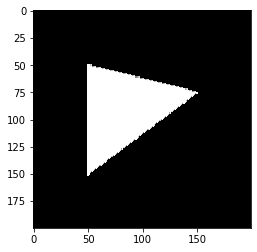

In [13]:
def trojkat2(x1, y1, x2, y2, x3, y3):
    RGB = np.zeros((200, 200, 3), dtype = np.uint8)

    RGB = lineXW(x1, y1, x2, y2, RGB)
    RGB = lineXW(x2, y2, x3, y3, RGB)
    RGB = lineXW(x3, y3, x1, y1, RGB)
    
    #P_ABC < P_ABQ + P_AQC + P_QBC
    #P - pole trójkąta wyznaczonego przez 3 punkty podane jako indeksy.
    #Jeżeli nierówność jest spełniona, to punkt Q leży poza trójkątem. 
    
    """
    Q = [83, 91]
    P_ABC = heron(x1, y1, x2, y2, x3, y3)
    P_ABQ = heron(x1, y1, x2, y2, Q[0], Q[1])
    P_AQC = heron(x1, y1, Q[0], Q[1], x3, y3)
    P_QBC = heron(Q[0], Q[1], x2, y2, x3, y3)
    
    print(P_ABC)
    P_Q = P_ABQ + P_AQC + P_QBC
    print(P_Q)
    print(P_ABC+1 < P_Q)
    
    x = x1 + x2 + x3 
    x = x/3
    
    y = y1 + y2 + y3
    y = y/3
    print(x, y)
    """
    
    for xx in range(200):
        for yy in range(200):
            try:
                P_ABC = heron(x1, y1, x2, y2, x3, y3)
                P_ABQ = heron(x1, y1, x2, y2, xx, yy)
                P_AQC = heron(x1, y1, xx, yy, x3, y3)
                P_QBC = heron(xx, yy, x2, y2, x3, y3)
            
                P_Q = P_ABQ + P_AQC + P_QBC
            
                if not P_ABC+1 < P_Q:
                    RGB[yy, xx] = 255
            except ValueError:
                continue
    
    return RGB


def heron(x1, y1, x2, y2, x3, y3):
    a = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    b = math.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    c = math.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    #print("a:", a, "b:", b, "c:", c)
    p = (a + b + c) / 2
    P = math.sqrt(p * (p-a) * (p-b) * (p-c))
    
    return P

def plotted(data, filename, show=True):
    assert isinstance(filename, str)
    
    plt.imshow(data, interpolation='none')
    plt.imsave(filename, data, format='png')

    if show:
        plt.show()


outcome = trojkat2(50, 150, 150, 75, 50, 50)
plotted(outcome, 'trojkat2.png', True)